In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.rc('figure', facecolor='w')

COLORS = {'La': '#1f77b4', 'Lb': '#ff7f0e'}

In [51]:
def read_energies(filename):
    return np.loadtxt(filename).T

def plot_energies_single(ax, filename):
    x, La, Lb = read_energies(filename)
    ax.plot(x, La, color=COLORS['La'])
    ax.plot(x, Lb, color=COLORS['Lb'])

In [52]:
filenames = {
    'wB97X': {
        'Gas phase': 'wB97X/wB97X_gas_energies.dat',
        'Water': 'wB97X/wB97X_ElEmb_energies.dat',
        'HSA': 'wB97X/HSA_wB97X_ElEmb_energies.dat'
    },
    'MM': {
        'Gas phase': 'wB97X/MM_gas_energies.dat',
        'Water': 'wB97X/MM_MM_energies.dat',
        'HSA': 'wB97X/HSA_MM_MM_energies.dat'
    },
    'ANI-2x': {
        'Gas phase': 'wB97X/ANI-2x_gas_energies.dat',
        'Water': 'wB97X/ANI-2x_EMLE_energies.dat',
        'HSA': 'wB97X/HSA_ANI-2x_EMLE_energies.dat'
    }
}


methods = ['wB97X', 'MM', 'ANI-2x']
systems = ['Gas phase', 'Water', 'HSA']

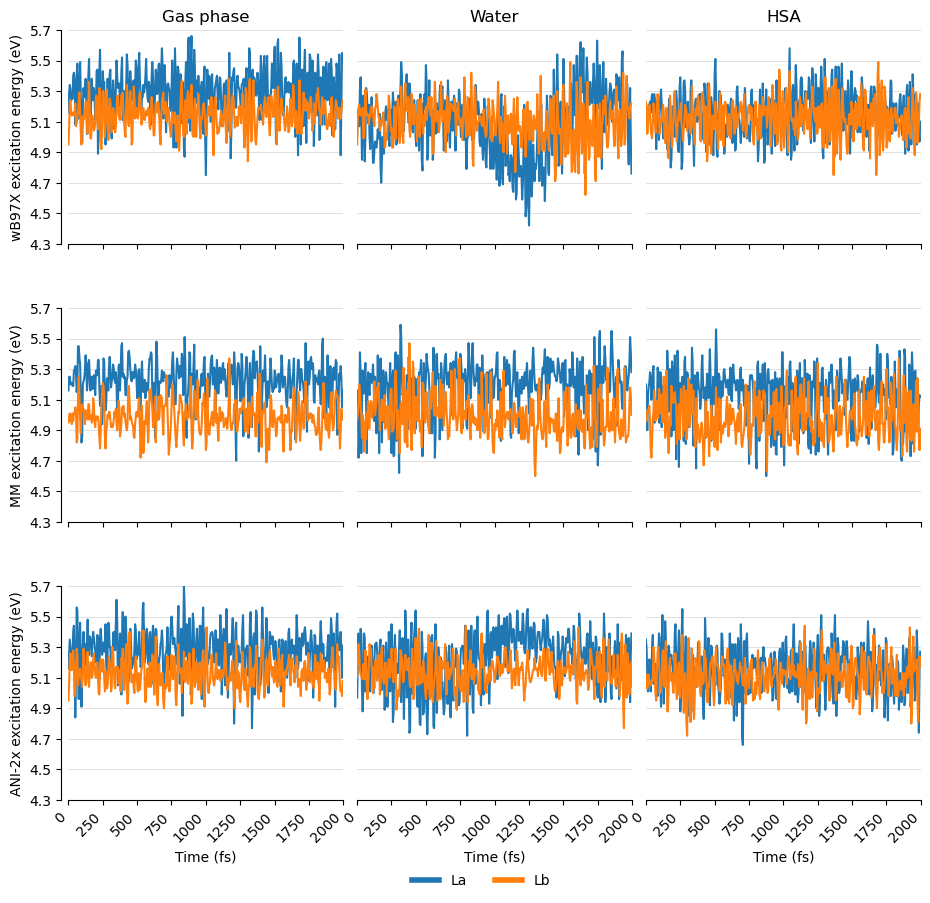

In [70]:
fig, axs = plt.subplots(3, 3, figsize=(11, 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.05)

yticks = np.arange(4.3, 5.71, 0.2)

# for (method, system), (i, ax) in zip(product(methoods, systems), enumerate(axs.flatten())):
for i, (method, method_axs) in enumerate(zip(methods, axs)):
    for j, (system, ax) in enumerate(zip(systems, method_axs)):
        plot_energies_single(ax, filenames[method][system])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlim([0, 2000])
        ax.set_xticks(np.arange(0, 2001, 250))
        ax.set_xticklabels(np.arange(0, 2001, 250), rotation=45, ha='right')
        ax.set_ylim([4.3, 5.7])
        ax.set_yticks(yticks)
        for ytick in yticks:
            ax.axhline(ytick, linewidth=0.5, color='lightgrey', zorder=0)
        if i == 2:
            ax.set_xlabel('Time (fs)')
            # ax.tick_params(axis='x', rotation=45)
        # ax.set_xlabel('Time (fs)')
        if j == 0:
            ax.spines['left'].set_position(('data', -50))
            ax.set_ylabel(f'{method} excitation energy (eV)')
        else:
            ax.yaxis.set_visible(False)
            ax.spines['left'].set_visible(False)
        if i == 0:
            ax.set_title(system)

custom_lines = [Line2D([0], [0], color=COLORS['La'], lw=4),
                Line2D([0], [0], color=COLORS['Lb'], lw=4)]
plt.figlegend(custom_lines, 
              ['La', 'Lb'], 
              loc='lower center', 
              ncol=3,
              bbox_to_anchor=(0.5, 0.01),
              frameon=False)
    
fig.savefig('FigS5.png', dpi=300, bbox_inches='tight')
plt.show()